In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install urlextract
import urlextract
!pip install wordcloud
from wordcloud import WordCloud
!pip install emoji
import emoji

In [7]:
f=open('data/WhatsApp Chat with WAGDemoGroup (4).txt','r',encoding='utf-8')

In [8]:
data=f.read()

In [9]:
print(data)

7/6/23, 19:10 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
7/6/23, 19:11 - You created group "WAGDemoGroup"
16/6/23, 09:12 - Vedansh: Hey all
16/7/23, 09:12 - Vedansh: How are you all?
17/7/23, 11:14 - Vedansh: 😀😀
17/7/23, 19:15 - Naveen AU: Hloo
17/7/23, 19:15 - Vedansh: How are you Naveen?
17/7/23, 19:15 - Vedansh: All good?
27/8/23, 19:16 - Naveen AU: Yeah good man
27/8/23, 19:16 - Naveen AU: What about you
27/8/23, 19:16 - Vedansh: I'm fine 😊
27/8/23, 19:17 - Vedansh: Just a little stressed about college and exams 😔
27/8/23, 19:17 - Naveen AU: Say more
27/8/23, 19:17 - Naveen AU: Yes I Too!
2/9/23, 20:17 - Naveen AU: I'm tensed
2/9/23, 20:17 - Vedansh: It is really very consuming... getting really tired after college 😔
2/9/23, 20:18 - Naveen AU: Yes
7/9/23, 14:18 - Naveen AU: Where are our friends
7/9/23, 14:18 - Vedansh: Hey @919948603542
7/9/23, 14:18 - Vedansh: Hey @918522922311
8/9/

In [11]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [20]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'You created group "WAGDemoGroup"\n',
 'Vedansh: Hey all\n',
 'Vedansh: How are you all?\n',
 'Vedansh: 😀😀\n',
 'Naveen AU: Hloo\n',
 'Vedansh: How are you Naveen?\n',
 'Vedansh: All good?\n',
 'Naveen AU: Yeah good man\n',
 'Naveen AU: What about you\n',
 "Vedansh: I'm fine 😊\n",
 'Vedansh: Just a little stressed about college and exams 😔\n',
 'Naveen AU: Say more\n',
 'Naveen AU: Yes I Too!\n',
 "Naveen AU: I'm tensed\n",
 'Vedansh: It is really very consuming... getting really tired after college 😔\n',
 'Naveen AU: Yes\n',
 'Naveen AU: Where are our friends\n',
 'Vedansh: Hey @919948603542\n',
 'Vedansh: Hey @918522922311\n',
 'Vedansh: You guys there?\n',
 'Preethi AU: https://youtu.be/h3vZF9w2cVk?si=tvIRWnpirUx4_TVq\n',
 'Vedansh: How are you guys preparing for the exam?\n',
 'Vedansh: Woww... i really like her channel\n',
 'Preethi AU:

In [21]:
dates=re.findall(pattern,data)
dates

['7/6/23, 19:10 - ',
 '7/6/23, 19:11 - ',
 '16/6/23, 09:12 - ',
 '16/7/23, 09:12 - ',
 '17/7/23, 11:14 - ',
 '17/7/23, 19:15 - ',
 '17/7/23, 19:15 - ',
 '17/7/23, 19:15 - ',
 '27/8/23, 19:16 - ',
 '27/8/23, 19:16 - ',
 '27/8/23, 19:16 - ',
 '27/8/23, 19:17 - ',
 '27/8/23, 19:17 - ',
 '27/8/23, 19:17 - ',
 '2/9/23, 20:17 - ',
 '2/9/23, 20:17 - ',
 '2/9/23, 20:18 - ',
 '7/9/23, 14:18 - ',
 '7/9/23, 14:18 - ',
 '7/9/23, 14:18 - ',
 '8/9/23, 11:19 - ',
 '27/9/23, 19:19 - ',
 '27/9/23, 19:19 - ',
 '27/9/23, 19:20 - ',
 '27/9/23, 19:20 - ',
 '27/9/23, 19:20 - ',
 '27/9/23, 19:20 - ',
 '27/9/23, 19:21 - ',
 '27/9/23, 19:22 - ',
 '27/9/23, 19:22 - ',
 '27/9/23, 19:23 - ',
 '27/9/23, 19:23 - ',
 '27/9/23, 19:23 - ',
 '27/9/23, 19:24 - ',
 '27/9/23, 19:25 - ',
 '27/9/23, 19:25 - ',
 '27/9/23, 19:26 - ',
 '27/9/23, 19:27 - ',
 '27/9/23, 19:27 - ',
 '27/9/23, 19:27 - ',
 '27/9/23, 19:27 - ',
 '27/9/23, 19:27 - ',
 '18/10/23, 08:28 - ',
 '18/10/23, 05:33 - ',
 '18/10/23, 05:33 - ',
 '18/10/23, 06:3

In [22]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date':'date'} , inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-06-07 19:10:00
1,"You created group ""WAGDemoGroup""\n",2023-06-07 19:11:00
2,Vedansh: Hey all\n,2023-06-16 09:12:00
3,Vedansh: How are you all?\n,2023-07-16 09:12:00
4,Vedansh: 😀😀\n,2023-07-17 11:14:00


In [23]:
df.shape

(47, 2)

In [24]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2023-06-07 19:10:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-06-07 19:11:00,group_notification,"You created group ""WAGDemoGroup""\n"
2,2023-06-16 09:12:00,Vedansh,Hey all\n
3,2023-07-16 09:12:00,Vedansh,How are you all?\n
4,2023-07-17 11:14:00,Vedansh,😀😀\n


In [25]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [116]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-06-07 19:10:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-06-07,2023,6,June,7,Wednesday,19,10
1,2023-06-07 19:11:00,group_notification,"You created group ""WAGDemoGroup""\n",2023-06-07,2023,6,June,7,Wednesday,19,11
2,2023-06-16 09:12:00,Vedansh,Hey all\n,2023-06-16,2023,6,June,16,Friday,9,12
3,2023-07-16 09:12:00,Vedansh,How are you all?\n,2023-07-16,2023,7,July,16,Sunday,9,12
4,2023-07-17 11:14:00,Vedansh,😀😀\n,2023-07-17,2023,7,July,17,Monday,11,14


In [26]:
user_list=df['user'].unique().tolist()
if 'group_notification' in user_list:
    user_list.remove('group_notification')
user_list.sort()
users = pd.DataFrame(user_list,columns=['Users'])
users = users.rename(index = lambda x: x + 1)

In [27]:
msgs=df['user'].tolist()
nom=[]
for i in user_list:
    nom.append(msgs.count(i))
users['Total Number of Messages']=nom
users.head()

,Users,Total Number of Messages
1,Naveen AU,12
2,Preethi AU,5
3,Vedansh,28


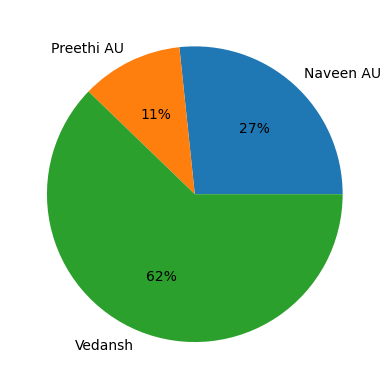

In [28]:
y=np.array(nom)
plt.pie(y,labels=user_list,autopct='%1.0f%%')
plt.show()

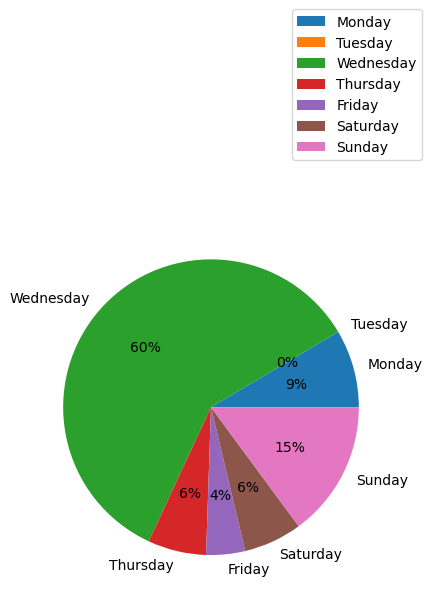

In [29]:
mostdays=df['day_name'].tolist()
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
md=df['day_name'].unique().tolist()
y=[]
for i in days:
    if i in md:
        y.append(mostdays.count(i))
    else:
        y.append(0)
xy=np.array(y)
plt.pie(xy,labels=days,autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.7, 1.15))
plt.show()

In [30]:
from urlextract import URLExtract

extractor = URLExtract()
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [31]:
li=[]
med=[]
use=[]
for i in user_list:
    use=[]
    d=0
    nf=df[df['user']==i]
    for message in nf['message']:
        if message=='<Media omitted>\n':
            d+=1
        use.extend(extractor.find_urls(message))
    li.append(len(use))
    med.append(d)
users['Number of links shared']=li
users['Number of Media Shared']=med
users.head()
        

,Users,Total Number of Messages,Number of links shared,Number of Media Shared
1,Naveen AU,12,0,0
2,Preethi AU,5,1,0
3,Vedansh,28,1,0


In [32]:
textm=[]
for i,j,k in zip(li,med,nom):
    x=k-i-j
    textm.append(x)

In [33]:
users['Number of Text Messages']=textm
users.head()

,Users,Total Number of Messages,Number of links shared,Number of Media Shared,Number of Text Messages
1,Naveen AU,12,0,0,12
2,Preethi AU,5,1,0,4
3,Vedansh,28,1,0,27


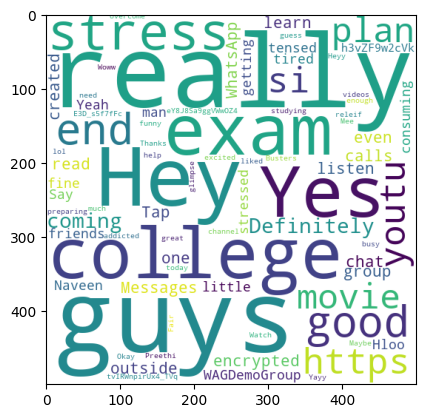

In [125]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wcount=wc.generate(df['message'].str.cat(sep=' '))
plt.imshow(wcount)

In [34]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [35]:
f=open('data/stop words.txt','r')
stop=f.read()
s=stop.split('\n')

In [36]:
words=[]
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']
fp=temp
for message in temp['message']:
    k=[]
    for word in message.lower().split():
        if word not in s:
            if word not in links:
                k.append(word)
    words.append(' '.join(k))

In [37]:
x=[]
for i in words:
    s=i.strip(' ')
    s=s.strip('.')
    s=s.strip(',')
    s=s.strip('$')
    s=s.strip('?')
    s=s.strip('%')
    if s.isalpha()==True:
        x.append(s)
words=x
words


from collections import Counter
top_words=pd.DataFrame(Counter(words).most_common(10),columns=['Message Word','Frequency'])
top_words = top_words.rename(index = lambda x: x + 1)
top_words

,Message Word,Frequency
1,all,2
2,hloo,1
3,naveen,1
4,definitely,1
5,guys,1


In [38]:
st='\n'.join(words)
file=open('data/Words.txt','w')
file.write(st)
file.close()

In [40]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji('c')])

In [41]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

""


In [42]:
df['month_num']=df['date'].dt.month

In [43]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [44]:
timeline

,year,month_num,month,message
0,2023,6,June,3
1,2023,7,July,5
2,2023,8,August,6
3,2023,9,September,28
4,2023,10,October,5


In [45]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + ' - '+str(timeline['year'][i]))

In [46]:
timeline['time']=time
timeline

,year,month_num,month,message,time
0,2023,6,June,3,June - 2023
1,2023,7,July,5,July - 2023
2,2023,8,August,6,August - 2023
3,2023,9,September,28,September - 2023
4,2023,10,October,5,October - 2023


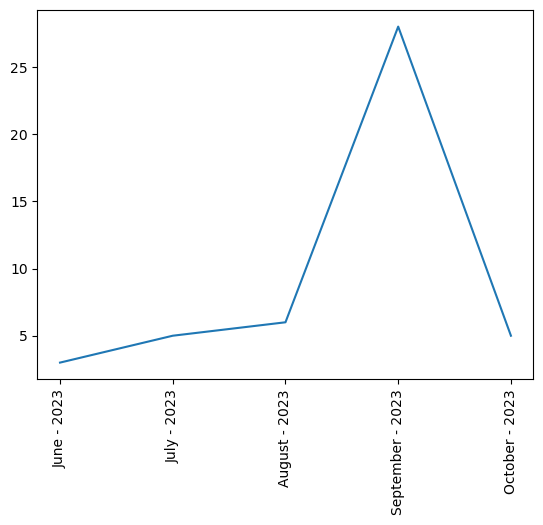

In [47]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+'-'+str(hour+1))

In [49]:
df['period']=period

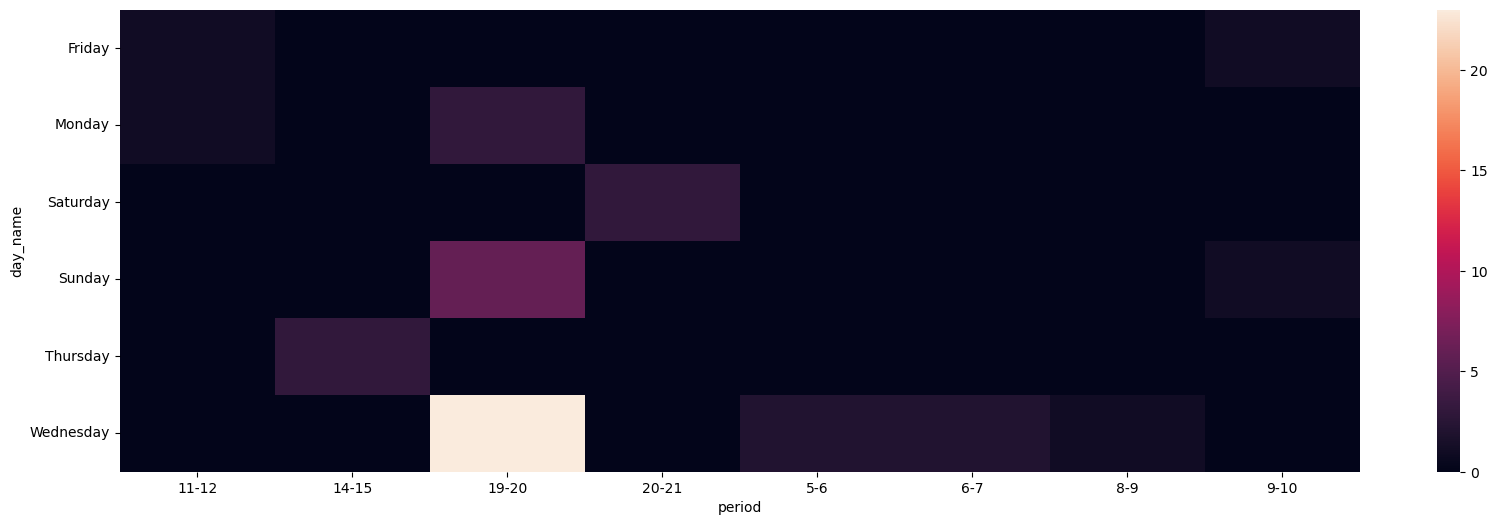

In [51]:
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [56]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
def predict_emotion(cv,sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    return (prediction[0])
    #pred_percentage_for_all



In [57]:
import joblib
cv=joblib.load('data/vector.pkl')
model=joblib.load('data/emotion_classifier.pkl')

/Users/pradyunreddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/pradyunreddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [60]:
predict_emotion(cv,["I am so scared"],model)

'fear'

In [63]:
k=fp["message"]
res=[]
for i in k:
        s=i.strip("\n")
        if s not in links:
            res.append(s)
res

['Hey all',
 'How are you all?',
 '😀😀',
 'Hloo',
 'How are you Naveen?',
 'All good?',
 'Yeah good man',
 'What about you',
 "I'm fine 😊",
 'Just a little stressed about college and exams 😔',
 'Say more',
 'Yes I Too!',
 "I'm tensed",
 'It is really very consuming... getting really tired after college 😔',
 'Yes',
 'Where are our friends',
 'Hey @919948603542',
 'Hey @918522922311',
 'You guys there?',
 'How are you guys preparing for the exam?',
 'Woww... i really like her channel',
 'Watch out this to releif your stress😄',
 'Her videos are really funny',
 'Thanks Preethi 😁',
 'Where is @919948603542 ?',
 'I guess he is busy studying',
 "Mee too and I'm very much addicted to stress Busters",
 'Maybe🤷\u200d♀️',
 'Fair enough 😂',
 'We need her help to overcome our stress lol',
 "I'm really excited for this movie 😁",
 'We all should plan for this movie after our exams',
 'Definitely 🙃',
 '@916303685487 @919948603542 you guys in for the plan?',
 'Yes',
 'Definitely',
 'You liked the glimps

In [64]:
dic={"sadness":0,"anger":0,"disgust":0,"fear":0,"joy":0,"neutral":0,"shame":0,"surprise":0}
for i in res:
    d=[i]
    a=predict_emotion(cv,d,model)
    dic[a]+=1
print(dic)

{'sadness': 5, 'anger': 0, 'disgust': 0, 'fear': 0, 'joy': 36, 'neutral': 2, 'shame': 0, 'surprise': 0}


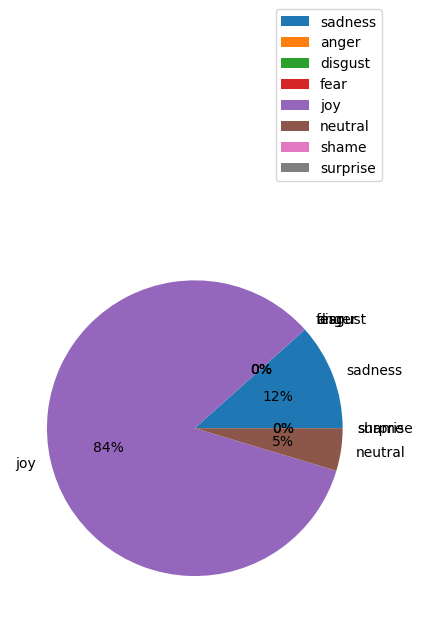

In [65]:
em=[]
val=[]
for i in dic:
    em.append(i)
    val.append(dic[i])

ab=np.array(val)
plt.pie(ab,labels=em,autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.7, 1.15))
plt.show()